## Task 1

In [86]:
import os
import pandas as pd 
import numpy as np 

In [99]:
# suppress pandas (append) future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas
pd.reset_option('all')

In [ ]:
# import data

with open("WB_songs.txt", 'r', encoding = "utf-8") as p:
    songs = p.read()
    
songs

In [89]:
starting_point = songs.find('The Voice of the Ancient Bard\n\n\n\n\n')

starting_point += len('The Voice of the Ancient Bard\n\n\n\n\n')

In [ ]:
new_songs = songs[starting_point:]

In [91]:
splittedpoems = new_songs.split("\n\n\n\n\n")

In [92]:
len(splittedpoems)

50

In [93]:
splitted_poems = splittedpoems[:-1] # remove last useless part 

In [95]:
for poem in splitted_poems:
     poems = poem.split('\n')

poems = list(map(lambda x: x.split('\n'), splitted_poems))

In [132]:
poems[0][0]

'SONGS OF INNOCENCE'

In [163]:
df = pd.DataFrame(columns = ['line', 'line_number', 'stanza', 'poem_title', 'book_title'])

dic = {}

#line_counter = 0
#stanza_counter = 0
#book_title = ''

# poem_title = ''
book_title = "SONGS OF INNOCENCE"
for poem in poems:
    if poem[0] == "SONGS OF EXPERIENCE":
        book_title = poem[0]
        poems.remove(poem)
    for line in poem:
        line_counter = 0
        stanza_counter = 0
        #print(line)
        if line == line.upper():
            poem_title = line
        if line == '':
            stanza_counter += 1
        if line != '':
            stanza_counter += 1
            line_counter += 1       
        dic = {}
        dic['line_number'] = line_counter
        dic['line'] = line
        dic['poem_title'] = poem_title
        dic['stanza'] = stanza_counter
        dic['book_title'] = book_title
        df = df.append(dic, ignore_index=True)
        #print(dic)
        
df

,line,line_number,stanza,poem_title,book_title
0,SONGS OF INNOCENCE,1,1,SONGS OF INNOCENCE,SONGS OF INNOCENCE
1,INTRODUCTION,1,1,INTRODUCTION,SONGS OF INNOCENCE
2,,0,1,,SONGS OF INNOCENCE
3,,0,1,,SONGS OF INNOCENCE
4,"Piping down the valleys wild,",1,1,,SONGS OF INNOCENCE
...,...,...,...,...,...
1201,Tangled roots perplex her ways;,1,1,,SONGS OF INNOCENCE
1202,How many have fallen there!,1,1,,SONGS OF INNOCENCE
1203,They stumble all night over bones of the dead;,1,1,,SONGS OF INNOCENCE
1204,And feel—they know not what but care;,1,1,,SONGS OF INNOCENCE


Couldn't make it in time :(( 

### Create a histogram showing the number of lines per poem 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [221]:
df = pd.read_csv(r'C:\Users\laura\OneDrive\Documenti\LAURA\HERTIE 22-23\Text_as_Data\text-as-data\text-as-data\Assignments\innocence_experience.csv', encoding = 'utf-8')

[Text(0.5, 0, 'Lines'), Text(0, 0.5, 'Poems')]

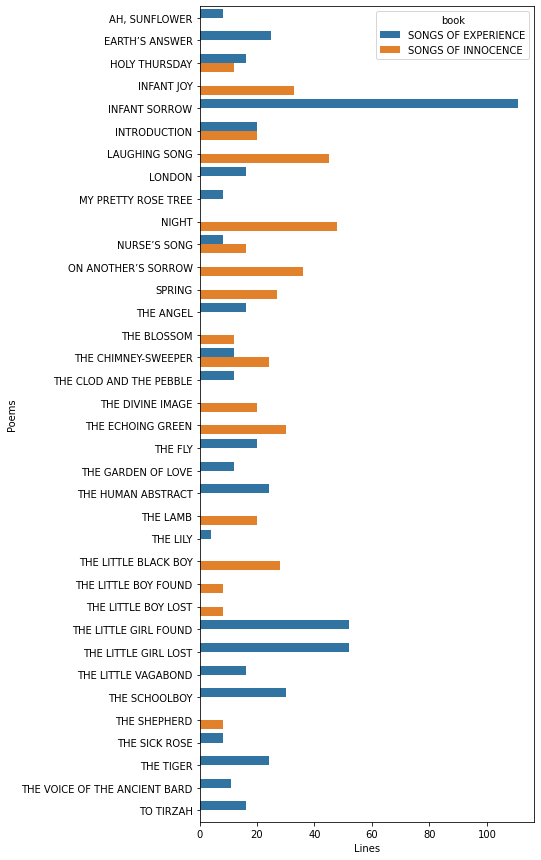

In [378]:
df_plot = df.groupby(['poem', 'book'], as_index = False).count()

f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(data=df_plot, y="poem", x="line_n", 
            hue="book") # here coloured bars by poem since there are 3 poem titles present in both books

ax.set(xlabel = 'Lines', ylabel = 'Poems')

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [274]:
# dfm treating each line to document 

# short preprocessing
stop_words = list(stopwords.words('english'))
df_line = df['text']
df_line.str.lower()
 
vectorizer = CountVectorizer(stop_words = stop_words)
dfm_line = vectorizer.fit_transform(df_line)
df_line = pd.DataFrame(dfm_line.todense(),
columns=vectorizer.get_feature_names_out())

In [275]:
# dfm poem to document

# short preprocessing
vectorizer = CountVectorizer(stop_words = stop_words)
df_grouped = (df
 .groupby(["book", "poem"])
 .agg(lambda x: " ".join(x))
 .reset_index()
)

dfm_poem = vectorizer.fit_transform(df_grouped.text)

df_poem = pd.DataFrame(dfm_poem.todense(),
columns=vectorizer.get_feature_names_out())

In [291]:
df_book = (df
 .groupby(["book"])
 .agg(lambda x: " ".join(x))
 .drop(['poem'], axis=1)
 .reset_index()
)

dfm_b = vectorizer.fit_transform(df_book['text'])

df_b = pd.DataFrame(dfm_b.todense(),
columns=vectorizer.get_feature_names_out())


df_final = pd.concat([df_book['book'], df_b], axis = 1, join='outer')

In [325]:
df_rank=(df_final
 .set_index("book")
 .stack()
 .reset_index()
 .sort_values(['book', 0], ascending=False)
 .groupby("book")
 .head(15)
)
df_rank.book = [book[0] for book in df_rank.book]

In [326]:
# renaming cols for plotting
df_rank = df_rank.rename(columns = {0 : 'count', 'level_1': 'words'})
df_rank

,book,words,count
2123,SONGS OF INNOCENCE,thee,25
1711,SONGS OF INNOCENCE,little,21
2102,SONGS OF INNOCENCE,sweet,19
1657,SONGS OF INNOCENCE,joy,17
1587,SONGS OF INNOCENCE,happy,13
1706,SONGS OF INNOCENCE,like,13
1310,SONGS OF INNOCENCE,child,12
1563,SONGS OF INNOCENCE,green,12
1673,SONGS OF INNOCENCE,lamb,12
2144,SONGS OF INNOCENCE,thy,12


<AxesSubplot:xlabel='words', ylabel='count'>

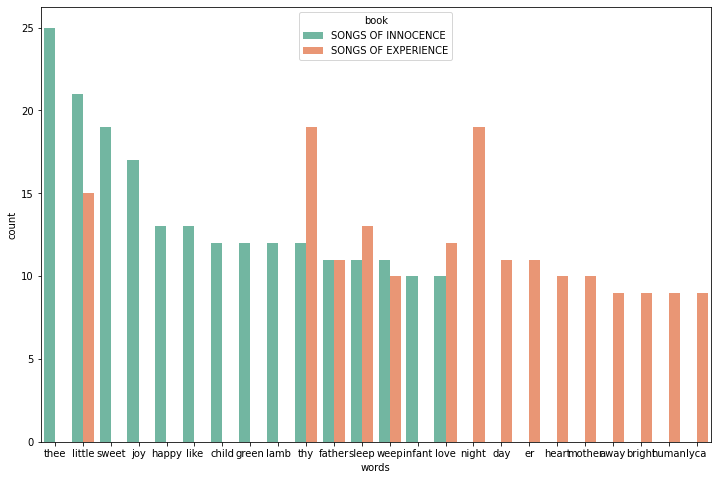

In [327]:
fig, ax = plt.subplots(figsize = (12, 8))

palette = sns.color_palette("Set2", as_cmap=True)

sns.barplot(
  data=df_rank, ax = ax,
  x="words", y="count", 
  hue="book", 
  palette = sns.color_palette("Set2", as_cmap=False)
)

### Comment
We can see two distingusheable trends here. Songs of Innocence is more linked to abstract words, like 'happy' and 'joy'. Also words like child and lamb are quite frequent, recalling probably from Biblical symbols. Songs of Experience instead has two semantically close words, sleep and night, probably indicating a trend for poems to be settled in dreamy environments or similar. The word human, and connections to human beings (father, mother) are also present - contrarily to Songs of Innocence - and this could be an interesting connection with the concept of 'Experience', which deals with a more human-related realm.  

## Task 2

In [3]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests

from bs4.element import Comment

In [42]:
url = 'https://www.bundestag.de/resource/blob/915646/552d8629012162f1bd35c703015e58b6/20060-data.xml'

data = requests.get(url)

soup = BeautifulSoup(data.content, features="xml")
soup.find_all('rede')[1].find('title')

In [64]:
df_speeches = pd.DataFrame(columns= ['speaker', 'content'])

for speech in soup.find_all('rede'):
    if speech.find('titel') != None:
        title = speech.find('titel').text
    else:
        title = ''
    if speech.find('vorname') != None:
        vorname = speech.find('vorname').text
    else:
        vorname = ''
    if speech.find('nachname') != None:
        name =  speech.find('nachname').text
    else:
        name = ''
    speaker = title + ' ' + vorname + ' ' + name
    content = ''
    parts = speech.find_all("p", {"klasse" : ["J", "J_1", "O"]})
    parts = " ".join([p.get_text() for p in parts])
    for part in parts:
        content += part
    
    dic = {'speaker' : speaker, 'content' : content}

    df_speeches = df_speeches.append(dic, ignore_index=True)

df_speeches

,speaker,content
0,Hubertus Heil,Meine sehr geehrte Frau Präsidentin! Liebe Kol...
1,Stephan Stracke,Frau Präsidentin! Meine sehr verehrten Damen u...
2,Beate Müller-Gemmeke,Sehr geehrte Frau Präsidentin! Sehr geehrter H...
3,Gerrit Huy,Frau Präsidentin! Meine Damen und Herren! Die ...
4,Jens Teutrine,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...
...,...,...
140,Jan Wenzel Schmidt,Sehr geehrter Herr Präsident! Werte Kollegen! ...
141,Dr. Sebastian Schäfer,Sehr geehrter Herr Präsident! Sehr geehrte Kol...
142,Christian Görke,Herr Präsident! Liebe Kolleginnen und Kollegen...
143,Christian Hirte,Sehr geehrter Herr Präsident! Meine sehr geehr...


In [84]:
speakers = list(df_speeches['speaker'])

speakers.index(' Katrin Göring-Eckardt') # first speech 

25

In [67]:
print(df_speeches['content'][25]) # content of first speech

Sehr geehrte Frau Präsidentin! Liebe Kolleginnen und Kollegen! Angela Merkel hat in dieser Woche den Nansen-Preis verliehen bekommen. Und was hat
                    sie damit gemacht? Sie hat ihn den deutschen Flüchtlingshelferinnen und Flüchtlingshelfern gewidmet. Sie, liebe Kolleginnen und Kollegen von der Union, beschreiten jetzt den entgegengesetzten Weg. Sie fallen all denjenigen in den Rücken, die helfen,
                    die organisieren, die arbeiten – in Verwaltungen, ehrenamtlich, wo auch immer. Das, was Sie mit Ihrem Antrag hier gerade machen, ist, Panik zu schüren. Und Sie
                    machen das auf dem Rücken der Helfer/-innen, und Sie machen es auf dem Rücken der Geflüchteten. Ich finde das absurd und der demokratischen Diskussion hier nicht würdig, meine Damen und Herren. Jetzt wurde entlarvt, dass ihr Vorsitzender, Friedrich Merz, seinen unsäglichen Vorwurf gegen die Geflüchteten aufgrund einer anonymen
                    Telegram-Nachricht gemacht hat. Her

In [68]:
print(sum(df_speeches['speaker'] == ' Katrin Göring-Eckardt')) # number of speeches

1


## Task 3

In [31]:
import pandas as pd
import re
import string

In [69]:
# check if regex works

df_speeches[df_speeches.content.str.contains(".*[kK][oO][hH][lL][eE].*")]

,speaker,content
51,Maria-Lena Weiss,Frau Präsidentin! Liebe Kolleginnen und Kolleg...
54,Michael Kruse,Liebe Kolleginnen und Kollegen! Dieser Nach-Af...
57,Anne König,Sehr geehrte Frau Präsidentin! Verehrte Kolleg...
59,Karsten Hilse,Frau Präsidentin! Meine Damen und Herren! Lieb...
89,René Bochmann,Sehr geehrter Herr Präsident! Sehr geehrte Kol...
129,Klaus-Peter Willsch,Herr Präsident! Meine sehr verehrten Damen und...


In [73]:
pattern = re.compile(".*[kK][oO][hH][lL][eE].*")

protocol = ' '.join(list(df_speeches['content'])) 

matches = []
for item in protocol.split(' '):
    if re.match(pattern, item) != None:
        matches.append(item)     
matches

['Kohle,',
 'Kohlekraftwerke',
 'Kohle',
 'Kohleausstieg',
 'Braunkohlekraftwerke',
 'Kohlekraftwerke',
 'Kohlestrom']

In [76]:
K_freq = {x:matches.count(x) for x in matches}
K_freq

{'Kohle,': 1,
 'Kohlekraftwerke': 2,
 'Kohle': 1,
 'Kohleausstieg': 1,
 'Braunkohlekraftwerke': 1,
 'Kohlestrom': 1}